In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [3]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
mld1 = LinearRegression()

In [8]:
mld1.fit(x_train, y_train)

LinearRegression()

In [9]:
mld1.intercept_

-0.001136478919551003

In [10]:
mld1.coef_

array([ 0.0660192 , -0.01688005, -0.04933801,  0.03041406,  0.0281798 ,
       -0.0660192 ,  0.06052994,  0.78953689, -0.01757718, -0.00291796,
        0.01413375,  0.01295761,  0.00200056, -0.02355585, -0.01320977,
       -0.0286089 , -0.03604981])

In [11]:
mld1.score(x_train, y_train)

0.9409659371358082

In [13]:
y_hat = mld1.predict(x_test)

In [14]:
mld1.score(x_test, y_test)

0.946867240810428

In [15]:
error = y_test - y_hat

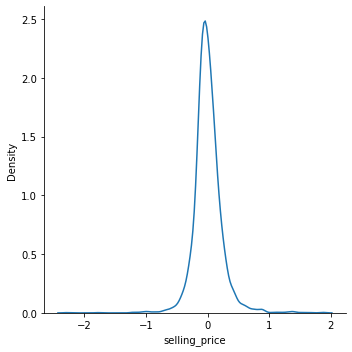

In [35]:
sns.displot(error, kind = 'kde')

In [16]:
np.mean(error)

0.0056823945977546395

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_test, y_hat)

0.05418133487669931

In [21]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [22]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"] 

In [23]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [24]:
X_sm = sm.add_constant(X)

In [25]:
X_sm.head()

,const,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,1.0,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,1.0,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,1.0,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,1.0,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [26]:
sm_model = sm.OLS(Y, X_sm).fit()

In [27]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.898e+04
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:52:29   Log-Likelihood:                 125.81
No. Observations:               19820   AIC:                            -215.6
Df Residuals:                   19802   BIC:                            -73.51
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.689e-17      0.002  

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\sci\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,17.95
10,Diesel,17.03
16,>5,13.32
15,5,12.08
3,engine,6.27
7,model,5.80
4,max_power,5.08
6,make,3.20


In [32]:
cols2 = ['engine','model','max_power','make','mileage','Manual','Diesel','Petrol','LPG','km_driven','Electric','Individual','Trustmark Dealer','5']

In [33]:
X2 = X[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y, X2_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.983e+04
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:00:25   Log-Likelihood:                -1276.9
No. Observations:               19820   AIC:                             2584.
Df Residuals:                   19805   BIC:                             2702.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.689e-17      0.002  

Text(0, 0.5, 'Residuals')

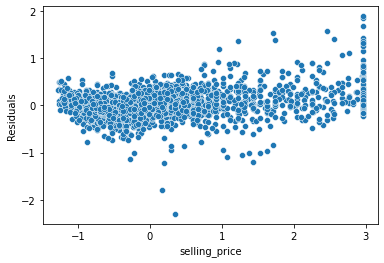

In [37]:
sns.scatterplot(x = y_test, y=error)
plt.ylabel("Residuals")

In [38]:
model2 = LinearRegression()

In [ ]:
model2.fit(X,Y)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error()

In [ ]:
errors = y_test - y_hat

In [ ]:
sns.distplot(errors)

In [ ]:
sns.scatterplot(y_test, errors)